In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import r2_score

df = pd.read_csv("linear_data.csv")

x = df[['user_posts','user_comments','user_shares','user_likes','user_sad', 'user_love', 'user_angry', 'user_wow', 'user_haha', 'user_thankful']].values
y = df['TRUST'].values


#Split the dataset in training/test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

scaler = StandardScaler()

#Train the model on the training set
normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train))
reg = LinearRegression()
LR = reg.fit(normalized_x_train, y_train)

#Predict the test set results
normalized_x_test = pd.DataFrame(scaler.transform(x_test))
y_test_pred = reg.predict(normalized_x_test)
#print(y_test_pred)

In [2]:
t = reg.predict([[2,2,1,10,1,3,0,0,0,0]])
print(t)

[0.56123341]


In [3]:
#Evaluate my model
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

-0.2345611723571006

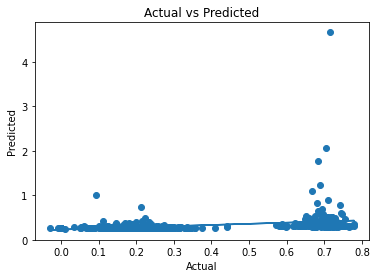

In [4]:
#Plot the results
import matplotlib.pyplot as plt
from scipy import stats
#plt.figure(figsize=(15,10))
slope, intercept, r, p, std_err = stats.linregress(y_test, y_test_pred)

def myfunc(y_test):
    return slope * y_test + intercept

mymodel = list(map(myfunc, y_test))

plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot(y_test, mymodel)
plt.show()

In [5]:
pred_y_df=pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_test_pred, 'Difference': y_test-y_test_pred })
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,0.2016,0.269610,-0.068010
1,0.1220,0.307621,-0.185621
2,0.2130,0.730238,-0.517238
3,0.7040,0.327174,0.376826
4,0.3550,0.263290,0.091710
5,0.7096,0.312652,0.396948
6,0.2300,0.258430,-0.028430
7,0.2050,0.268177,-0.063177
8,0.2416,0.270362,-0.028762
9,0.1500,0.260671,-0.110671
